<a href="https://colab.research.google.com/github/GeorgeSherif/NLP-ChatEGP/blob/main/paraphrasewithBertAgain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install transformers sentencepiece sacremoses
!pip3 install transformers sentencepiece protobuf torch pygal torchvision sacremoses
from transformers import *

In [ ]:
import pandas as pd
import numpy as np
import os
import warnings
import csv
import re
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go
import pygal as py
import matplotlib
plt.rcParams["figure.figsize"] = (8,5)
matplotlib.rc('xtick', labelsize=7) 
matplotlib.rc('ytick', labelsize=7) 

import torch
import torchvision

from sklearn.feature_extraction.text import CountVectorizer

warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline 

In [ ]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv("/content/drive/My Drive/all-data.csv",encoding = "ISO-8859-1")

In [ ]:
df.head

In [ ]:
model = PegasusForConditionalGeneration.from_pretrained("tuner007/pegasus_paraphrase")
tokenizer = PegasusTokenizerFast.from_pretrained("tuner007/pegasus_paraphrase")

In [ ]:
def get_paraphrased_sentences(model, tokenizer, sentence, num_return_sequences, num_beams):
  # tokenize the text to be form of a list of token IDs
  inputs = tokenizer([sentence], truncation=True, padding="longest", return_tensors="pt")
  # generate the paraphrased sentences
  outputs = model.generate(
    **inputs,
    num_beams=num_beams,
    num_return_sequences=num_return_sequences,
  )
  # decode the generated sentences using the tokenizer to get them back to text
  return tokenizer.batch_decode(outputs, skip_special_tokens=True)

In [ ]:
headerList = ['label', 'sentence']
  
# converting data frame to csv
df.to_csv("/content/drive/My Drive/all-data.csv", header=headerList, index=False)

file2 = pd.read_csv("/content/drive/My Drive/all-data.csv")

In [ ]:
file2['sentence'][1]

In [ ]:
df1 = pd.DataFrame(index=range(604), columns=['label' , 'sentence'])

In [12]:
j = 0
for i in range (len(file2)):
  if(file2['label'][i]=='negative'):
    df1['label'][j] = 'negative'
    df1['sentence'][j] = get_paraphrased_sentences(model, tokenizer, file2['sentence'][i], num_beams=1, num_return_sequences=1)
    j = j + 1
    

Streaming output truncated to the last 5000 lines.
  "forced_eos_token_id": 1,
  "length_penalty": 0.8,
  "max_length": 60,
  "num_beams": 8,
  "pad_token_id": 0,
  "transformers_version": "4.29.2"
}

Generate config GenerationConfig {
  "_from_model_config": true,
  "bos_token_id": 0,
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "forced_eos_token_id": 1,
  "length_penalty": 0.8,
  "max_length": 60,
  "num_beams": 8,
  "pad_token_id": 0,
  "transformers_version": "4.29.2"
}

Generate config GenerationConfig {
  "_from_model_config": true,
  "bos_token_id": 0,
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "forced_eos_token_id": 1,
  "length_penalty": 0.8,
  "max_length": 60,
  "num_beams": 8,
  "pad_token_id": 0,
  "transformers_version": "4.29.2"
}

Generate config GenerationConfig {
  "_from_model_config": true,
  "bos_token_id": 0,
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "forced_eos_token_id": 1,
  "length_penalty": 0.8,
  "max_length": 60,
  "num_beams

In [13]:
len(df1)

604

In [14]:
df1.head

<bound method NDFrame.head of         label                                           sentence
0    negative  [The company laid off tens of employees from i...
1    negative  [A.tinyurl link takes users to a site that pro...
2    negative  [The price change was less than the rise in th...
3    negative  [The price change was less than the gain of th...
4    negative  [The scale formation that can plug the pipelin...
..        ...                                                ...
599  negative  [The cargo handling group posted a surprise dr...
600  negative  [The share prices in London ended lower on Mon...
601  negative  [The operating profit fell from the previous y...
602  negative  [Net sales of the Paper segment decreased to 2...
603  negative  [In January, sales in Finland decreased by 10%...

[604 rows x 2 columns]>

In [15]:
print(file2['sentence'][4])

FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is aggressively pursuing its growth strategy by increasingly focusing on technologically more demanding HDI printed circuit boards PCBs .


In [16]:
print(df1['sentence'][2])

['The price change was less than the rise in the index, which rose 36.7 points.']


In [17]:
len(file2)

4845

In [18]:
file2.append(df1)

,label,sentence
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
...,...,...
599,negative,[The cargo handling group posted a surprise dr...
600,negative,[The share prices in London ended lower on Mon...
601,negative,[The operating profit fell from the previous y...
602,negative,[Net sales of the Paper segment decreased to 2...


In [19]:

num_entries_to_remove_positive = (file2['label'] == 'positive').sum() - (file2['label'] == 'negative').sum()
num_entries_to_remove_neutral = (file2['label'] == 'neutral').sum() - (file2['label'] == 'negative').sum()
print(num_entries_to_remove_neutral)


indices_to_remove = file2[file2['label'] == 'positive'].sample(num_entries_to_remove_positive).index
dfPositive = file2[file2['label'] == 'positive'].drop(indices_to_remove)

indices_to_remove = file2[file2['label'] == 'neutral'].sample(num_entries_to_remove_neutral).index
dfNeutral = file2[file2['label'] == 'neutral'].drop(indices_to_remove)

indices_to_remove = file2[file2['label'] == 'negative'].sample(0).index
dfNegative = file2[file2['label'] == 'negative'].drop(indices_to_remove)

print(dfNegative)

2274
         label                                           sentence
1     negative  The international electronic industry company ...
414   negative  A tinyurl link takes users to a scamming site ...
420   negative  Compared with the FTSE 100 index , which rose ...
422   negative  Compared with the FTSE 100 index , which rose ...
499   negative  One of the challenges in the oil production in...
...        ...                                                ...
4839  negative  HELSINKI Thomson Financial - Shares in Cargote...
4840  negative  LONDON MarketWatch -- Share prices ended lower...
4842  negative  Operating profit fell to EUR 35.4 mn from EUR ...
4843  negative  Net sales of the Paper segment decreased to EU...
4844  negative  Sales in Finland decreased by 10.5 % in Januar...

[604 rows x 2 columns]


In [20]:
dfNew = pd.concat((dfNegative, dfNeutral, dfPositive), axis = 0)
dfNew
df = dfNew
     

In [21]:
df['label'] = df['label'].replace(['negative','neutral','positive'],[0,1,2])
df

,label,sentence
1,0,The international electronic industry company ...
414,0,A tinyurl link takes users to a scamming site ...
420,0,"Compared with the FTSE 100 index , which rose ..."
422,0,"Compared with the FTSE 100 index , which rose ..."
499,0,One of the challenges in the oil production in...
...,...,...
4568,2,Finnair was able to operate most of its leisur...
4574,2,"As part of the transaction , M-real and Sappi ..."
4591,2,"In the fourth quarter of 2009 , Atria 's net l..."
4601,2,The two companies will also partner in further...


<Axes: xlabel='count', ylabel='label'>

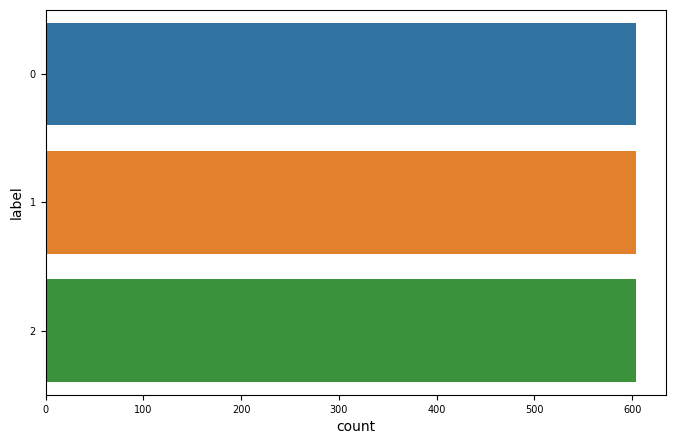

In [22]:
sns.countplot(y="label",data=df)

In [23]:
df.drop_duplicates(subset=['sentence'],keep='first',inplace=True)
df

,label,sentence
1,0,The international electronic industry company ...
414,0,A tinyurl link takes users to a scamming site ...
420,0,"Compared with the FTSE 100 index , which rose ..."
422,0,"Compared with the FTSE 100 index , which rose ..."
499,0,One of the challenges in the oil production in...
...,...,...
4568,2,Finnair was able to operate most of its leisur...
4574,2,"As part of the transaction , M-real and Sappi ..."
4591,2,"In the fourth quarter of 2009 , Atria 's net l..."
4601,2,The two companies will also partner in further...


In [24]:
from sklearn.model_selection import train_test_split
X_features = df["sentence"]
Y_features = df["label"]
X_train, X_val, y_train, y_val = train_test_split(df.index.values, df.label.values, test_size=0.2, random_state=42, shuffle=True)

In [25]:
from transformers import BertTokenizer,BertForSequenceClassification

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForSequenceClassification.from_pretrained('bert-base-uncased',
                                                      num_labels = 3,
                                                      id2label={0: 'negative', 1: 'neutral', 2: 'positive'},
                                                      output_attentions = False,
                                                      output_hidden_states = False).to(device)

loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/vocab.txt
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/tokenizer_config.json


loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.29.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/config.js

loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/pytorch_model.bin
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a

In [26]:
df['data_type'] = ['not_set'] * df.shape[0]

df.loc[X_train, 'data_type'] = 'train'
df.loc[X_val, 'data_type'] = 'val'

#groupby count
df.groupby([ 'label', 'data_type']).count()
#df = df.rename(columns={'Review Text': 'sentence'})
df[df.data_type == 'train'].sentence.values

array(['The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .',
       'A tinyurl link takes users to a scamming site promising that users can earn thousands of dollars by becoming a Google ( NASDAQ : GOOG ) Cash advertiser .',
       'Compared with the FTSE 100 index , which rose 36.7 points ( or 0.6 % ) on the day , this was a relative price change of -0.2 % .',
       ...,
       "In the fourth quarter of 2009 , Atria 's net loss shrank to EUR 1.2 million from EUR 5.9 million and net sales contracted to EUR 340.4 million from EUR 361.1 million .",
       "The two companies will also partner in further developing Raiso 's cholesterol lowering brand , Benecol .",
       '`` I am extremely delighted with this project and the continuation of cooperation with Viking Line .'],
      dtype=object)

In [27]:
#encode train set
encoded_data_train = tokenizer.batch_encode_plus(df[df.data_type == 'train'].sentence.values,
                                                add_special_tokens = True,
                                                return_attention_mask = True,
                                                pad_to_max_length = True,
                                                max_length = 150,
                                                truncation=True,
                                                return_tensors = 'pt')
                                                
#encode validation set
encoded_data_val = tokenizer.batch_encode_plus( df[df.data_type == 'val'].sentence.values,
                                                add_special_tokens = True,
                                                return_attention_mask = True,
                                                pad_to_max_length = True,
                                                max_length = 150,
                                                truncation=True,
                                                return_tensors = 'pt')

In [28]:
#train set
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df[df.data_type == 'train'].label.values)

#validation set
input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(df[df.data_type == 'val'].label.values)

In [29]:
from torch.utils.data import TensorDataset

#train set
dataset_train = TensorDataset(input_ids_train, 
                              attention_masks_train,
                              labels_train)

#validation set
dataset_val = TensorDataset(input_ids_val, 
                             attention_masks_val, 
                             labels_val)

In [30]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 8

#train set
dataloader_train = DataLoader(dataset_train,
                              sampler = RandomSampler(dataset_train),
                              batch_size = batch_size)

#validation set
dataloader_val = DataLoader(dataset_val,
                              sampler = RandomSampler(dataset_val),
                              batch_size = batch_size) #since we don't have to do backpropagation for this step

In [31]:
from transformers import AdamW, get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(),
                 lr = 1e-5,
                 eps = 1e-7) #2e-5 > 5e-5
                 
epochs = 8

scheduler = get_linear_schedule_with_warmup(optimizer,
                                           num_warmup_steps = 0,
                                           num_training_steps =len(dataloader_train)*epochs)

In [32]:

def evaluate(dataloader_val):

    #evaluation mode 
    model.eval()
    
    #tracking variables
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in tqdm(dataloader_val):
        
        #load into GPU
        batch = tuple(b.to(device) for b in batch)
        
        #define inputs
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2]}

        #compute logits
        with torch.no_grad():        
            outputs = model(**inputs)
        
        #compute loss
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        #compute accuracy
        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    #compute average loss
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals

In [33]:
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis = 1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average = 'weighted')

In [34]:
#accuracy score
def accuracy_per_class(preds, labels):
    #label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    #make prediction
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    
    correct = 0
    total = 0

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        #print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy:{len(y_preds[y_preds==label])}/{len(y_true)}\n -> {len(y_preds[y_preds==label]) / len(y_true)}')
        correct = correct + len(y_preds[y_preds==label])
        total = total + len(y_true)
    return correct / total

In [35]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [ ]:
from tqdm import tqdm
for epoch in tqdm(range(1, epochs+1)):
    
    model.train()
    
    loss_train_total = 0
    
    progress_bar = tqdm(dataloader_train, 
                        desc = 'Epoch {:1d}'.format(epoch), 
                        leave = False, 
                        disable = False)
    
    for batch in progress_bar:
        
        model.zero_grad() #set gradient to 0
    
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids': batch[0], 
                  'attention_mask': batch[1], 
                  'labels': batch[2]}
        
        outputs = model(**inputs) #unpack the dict straight into inputs
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()
        
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        
        optimizer.step()
        scheduler.step()
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item() / len(batch))})
        
    torch.save(model.state_dict(), f'/content/drive/MyDrive/BERT_ft_epoch{epoch}.model')
    
    tqdm.write('\n Epoch {epoch}')
    
    loss_train_ave = loss_train_total / len(dataloader_train)
    tqdm.write('Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(dataloader_val)
    true_vals.shape
    accuracy = accuracy_per_class(predictions, true_vals)

    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (weighted): {val_f1}')
    tqdm.write(f'Accuracy Score: {accuracy}')

  0%|          | 0/8 [00:44<?, ?it/s]


 Epoch {epoch}
Training loss: {loss_train_avg}



 12%|█▎        | 1/8 [00:47<05:30, 47.21s/it]

Accuracy:116/128
 -> 0.90625
Accuracy:83/107
 -> 0.7757009345794392
Accuracy:75/128
 -> 0.5859375
Validation loss: 0.5784478728537974
F1 Score (weighted): 0.7503516655031806
Accuracy Score: 0.7548209366391184



 12%|█▎        | 1/8 [01:29<05:30, 47.21s/it]


 Epoch {epoch}
Training loss: {loss_train_avg}



 25%|██▌       | 2/8 [01:33<04:38, 46.49s/it]

Accuracy:121/128
 -> 0.9453125
Accuracy:91/107
 -> 0.8504672897196262
Accuracy:83/128
 -> 0.6484375
Validation loss: 0.5174170100008664
F1 Score (weighted): 0.8091689638866285
Accuracy Score: 0.8126721763085399



 25%|██▌       | 2/8 [02:16<04:38, 46.49s/it]


 Epoch {epoch}
Training loss: {loss_train_avg}



 38%|███▊      | 3/8 [02:19<03:52, 46.53s/it]

Accuracy:121/128
 -> 0.9453125
Accuracy:83/107
 -> 0.7757009345794392
Accuracy:107/128
 -> 0.8359375
Validation loss: 0.4541953543363058
F1 Score (weighted): 0.8554193578424234
Accuracy Score: 0.8567493112947658



Epoch 4:  64%|██████▍   | 117/182 [00:27<00:14,  4.39it/s, training_loss=0.004]

In [ ]:
_, predictions, true_vals = evaluate(dataloader_val)

In [ ]:
true_vals.shape
accuracy_per_class(predictions, true_vals)